#Natural Language Processing  for Movie Reviews Dataset


In [1]:
import nltk

In [2]:
nltk.download("movie_reviews")

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


True

In [4]:
from nltk.corpus import movie_reviews

The `fileids` method provided by all the datasets in `nltk.corpus` gives access to a list of all the files available.

In particular in the movie_reviews dataset we have 2000 text files, each of them is a review of a movie, and they are already split in a `neg` folder for the negative reviews and a `pos` folder for the positive reviews:

In [5]:
len(movie_reviews.fileids())

2000

In [6]:
movie_reviews.fileids()[:5]

['neg/cv000_29416.txt',
 'neg/cv001_19502.txt',
 'neg/cv002_17424.txt',
 'neg/cv003_12683.txt',
 'neg/cv004_12641.txt']

In [10]:
#filtering between postive and negetive review
negative_fileids = movie_reviews.fileids('neg')
positive_fileids = movie_reviews.fileids('pos')

In [11]:
len(negative_fileids), len(positive_fileids)

(1000, 1000)

In [13]:
#Inspecting the first postive review
print(movie_reviews.raw(fileids=positive_fileids[0]))

films adapted from comic books have had plenty of success , whether they're about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there's never really been a comic book like from hell before . 
for starters , it was created by alan moore ( and eddie campbell ) , who brought the medium to a whole new level in the mid '80s with a 12-part series called the watchmen . 
to say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd . 
the book ( or " graphic novel , " if you will ) is over 500 pages long and includes nearly 30 more that consist of nothing but footnotes . 
in other words , don't dismiss this film because of its source . 
if you can get past the whole comic book thing , you might find another stumbling block in from hell's directors , albert and allen hughes . 
getting the hughes brothers to direct this seems almost as 

## Tokenize Text in Words

In [14]:
romeo_text = """Why then, O brawling love! O loving hate!
O any thing, of nothing first create!
O heavy lightness, serious vanity,
Misshapen chaos of well-seeming forms,
Feather of lead, bright smoke, cold fire, sick health,
Still-waking sleep, that is not what it is!
This love feel I, that feel no love in this."""

In [15]:
romeo_text.split()

['Why',
 'then,',
 'O',
 'brawling',
 'love!',
 'O',
 'loving',
 'hate!',
 'O',
 'any',
 'thing,',
 'of',
 'nothing',
 'first',
 'create!',
 'O',
 'heavy',
 'lightness,',
 'serious',
 'vanity,',
 'Misshapen',
 'chaos',
 'of',
 'well-seeming',
 'forms,',
 'Feather',
 'of',
 'lead,',
 'bright',
 'smoke,',
 'cold',
 'fire,',
 'sick',
 'health,',
 'Still-waking',
 'sleep,',
 'that',
 'is',
 'not',
 'what',
 'it',
 'is!',
 'This',
 'love',
 'feel',
 'I,',
 'that',
 'feel',
 'no',
 'love',
 'in',
 'this.']

In [16]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [17]:
#splitting the text
romeo_words = nltk.word_tokenize(romeo_text)

In [18]:
romeo_words

['Why',
 'then',
 ',',
 'O',
 'brawling',
 'love',
 '!',
 'O',
 'loving',
 'hate',
 '!',
 'O',
 'any',
 'thing',
 ',',
 'of',
 'nothing',
 'first',
 'create',
 '!',
 'O',
 'heavy',
 'lightness',
 ',',
 'serious',
 'vanity',
 ',',
 'Misshapen',
 'chaos',
 'of',
 'well-seeming',
 'forms',
 ',',
 'Feather',
 'of',
 'lead',
 ',',
 'bright',
 'smoke',
 ',',
 'cold',
 'fire',
 ',',
 'sick',
 'health',
 ',',
 'Still-waking',
 'sleep',
 ',',
 'that',
 'is',
 'not',
 'what',
 'it',
 'is',
 '!',
 'This',
 'love',
 'feel',
 'I',
 ',',
 'that',
 'feel',
 'no',
 'love',
 'in',
 'this',
 '.']

In [22]:
#tokenizing the first movie review
movie_reviews.words(fileids=positive_fileids[0])[:20]

['films',
 'adapted',
 'from',
 'comic',
 'books',
 'have',
 'had',
 'plenty',
 'of',
 'success',
 ',',
 'whether',
 'they',
 "'",
 're',
 'about',
 'superheroes',
 '(',
 'batman',
 ',']

## Building a bag-of-words model

In [23]:
{word:True for word in romeo_words}

{'!': True,
 ',': True,
 '.': True,
 'Feather': True,
 'I': True,
 'Misshapen': True,
 'O': True,
 'Still-waking': True,
 'This': True,
 'Why': True,
 'any': True,
 'brawling': True,
 'bright': True,
 'chaos': True,
 'cold': True,
 'create': True,
 'feel': True,
 'fire': True,
 'first': True,
 'forms': True,
 'hate': True,
 'health': True,
 'heavy': True,
 'in': True,
 'is': True,
 'it': True,
 'lead': True,
 'lightness': True,
 'love': True,
 'loving': True,
 'no': True,
 'not': True,
 'nothing': True,
 'of': True,
 'serious': True,
 'sick': True,
 'sleep': True,
 'smoke': True,
 'that': True,
 'then': True,
 'thing': True,
 'this': True,
 'vanity': True,
 'well-seeming': True,
 'what': True}

In [24]:
type(_)

dict

In [25]:
#creating a function to return the words in dictionary
def build_bag_of_words_features(words):
    return {word:True for word in words}

In [26]:
build_bag_of_words_features(romeo_words)

{'!': True,
 ',': True,
 '.': True,
 'Feather': True,
 'I': True,
 'Misshapen': True,
 'O': True,
 'Still-waking': True,
 'This': True,
 'Why': True,
 'any': True,
 'brawling': True,
 'bright': True,
 'chaos': True,
 'cold': True,
 'create': True,
 'feel': True,
 'fire': True,
 'first': True,
 'forms': True,
 'hate': True,
 'health': True,
 'heavy': True,
 'in': True,
 'is': True,
 'it': True,
 'lead': True,
 'lightness': True,
 'love': True,
 'loving': True,
 'no': True,
 'not': True,
 'nothing': True,
 'of': True,
 'serious': True,
 'sick': True,
 'sleep': True,
 'smoke': True,
 'that': True,
 'then': True,
 'thing': True,
 'this': True,
 'vanity': True,
 'well-seeming': True,
 'what': True}

In [27]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [28]:
import string

In [29]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [31]:
#removing the stopwords
useless_words = nltk.corpus.stopwords.words("english") + list(string.punctuation)
useless_words
type(useless_words)

list

In [33]:
def build_bag_of_words_features_filtered(words):
    return {
        word:True for word in words \
        if not word in useless_words}

In [34]:
build_bag_of_words_features_filtered(romeo_words)

{'Feather': True,
 'I': True,
 'Misshapen': True,
 'O': True,
 'Still-waking': True,
 'This': True,
 'Why': True,
 'brawling': True,
 'bright': True,
 'chaos': True,
 'cold': True,
 'create': True,
 'feel': True,
 'fire': True,
 'first': True,
 'forms': True,
 'hate': True,
 'health': True,
 'heavy': True,
 'lead': True,
 'lightness': True,
 'love': True,
 'loving': True,
 'nothing': True,
 'serious': True,
 'sick': True,
 'sleep': True,
 'smoke': True,
 'thing': True,
 'vanity': True,
 'well-seeming': True}

## Plotting Frequencies of Words

It is common to explore a dataset before starting the analysis, in this section we will find the most common words and plot their frequency.

Using the `.words()` function with no argument we can extract the words from the entire dataset and check that it is about 1.6 millions.

In [35]:
# words in millions
all_words = movie_reviews.words()
len(all_words)/1e6

1.58382

In [36]:
filtered_words = [word for word in movie_reviews.words() if not word in useless_words]
type(filtered_words)

list

In [37]:
len(filtered_words)/1e6

0.710579

In [39]:
from collections import Counter

#counting frequencies of words in our list
word_counter = Counter(filtered_words)
word_counter

Counter({'plot': 1513,
         'two': 1911,
         'teen': 151,
         'couples': 27,
         'go': 1113,
         'church': 69,
         'party': 183,
         'drink': 32,
         'drive': 105,
         'get': 1949,
         'accident': 104,
         'one': 5852,
         'guys': 268,
         'dies': 104,
         'girlfriend': 218,
         'continues': 88,
         'see': 1749,
         'life': 1586,
         'nightmares': 26,
         'deal': 219,
         'watch': 603,
         'movie': 5771,
         'sorta': 10,
         'find': 782,
         'critique': 61,
         'mind': 451,
         'fuck': 17,
         'generation': 96,
         'touches': 55,
         'cool': 208,
         'idea': 386,
         'presents': 78,
         'bad': 1395,
         'package': 30,
         'makes': 992,
         'review': 295,
         'even': 2565,
         'harder': 33,
         'write': 119,
         'since': 768,
         'generally': 103,
         'applaud': 10,
         'films': 15

In [40]:
most_common_words = word_counter.most_common()[:10]

In [41]:
most_common_words

[('film', 9517),
 ('one', 5852),
 ('movie', 5771),
 ('like', 3690),
 ('even', 2565),
 ('good', 2411),
 ('time', 2411),
 ('story', 2169),
 ('would', 2109),
 ('much', 2049)]

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt

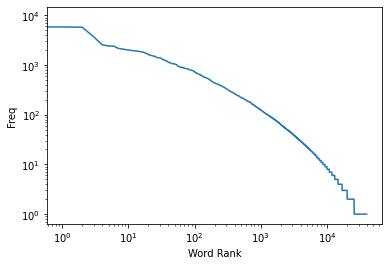

In [43]:
sorted_word_counts = sorted(list(word_counter.values()), reverse=True)

plt.loglog(sorted_word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank");

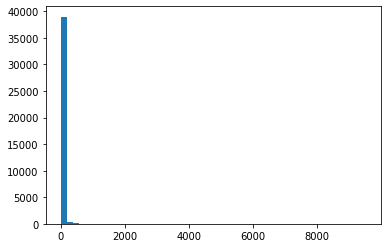

In [44]:
plt.hist(sorted_word_counts, bins=50);

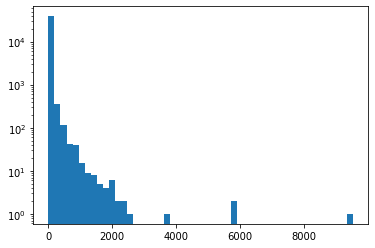

In [45]:
plt.hist(sorted_word_counts, bins=50, log=True);

## Train a Classifier for Sentiment Analysis

Using our `build_bag_of_words_features` function building separately the negative and positive features.
Basically for each of the 1000 negative and for the 1000 positive review, creating one dictionary of the words and associating the label "neg" and "pos" to it.

In [46]:
negative_features = [
    (build_bag_of_words_features_filtered(movie_reviews.words(fileids=[f])), 'neg') \
    for f in negative_fileids
]

In [49]:
print(negative_features[3])

({'quest': True, 'camelot': True, 'warner': True, 'bros': True, 'first': True, 'feature': True, 'length': True, 'fully': True, 'animated': True, 'attempt': True, 'steal': True, 'clout': True, 'disney': True, 'cartoon': True, 'empire': True, 'mouse': True, 'reason': True, 'worried': True, 'recent': True, 'challenger': True, 'throne': True, 'last': True, 'fall': True, 'promising': True, 'flawed': True, '20th': True, 'century': True, 'fox': True, 'production': True, 'anastasia': True, 'hercules': True, 'lively': True, 'cast': True, 'colorful': True, 'palate': True, 'beat': True, 'hands': True, 'came': True, 'time': True, 'crown': True, '1997': True, 'best': True, 'piece': True, 'animation': True, 'year': True, 'contest': True, 'pretty': True, 'much': True, 'dead': True, 'arrival': True, 'even': True, 'magic': True, 'kingdom': True, 'mediocre': True, '--': True, 'pocahontas': True, 'keeping': True, 'score': True, 'nearly': True, 'dull': True, 'story': True, 'revolves': True, 'around': True

In [50]:
positive_features = [
    (build_bag_of_words_features_filtered(movie_reviews.words(fileids=[f])), 'pos') \
    for f in positive_fileids
]

In [51]:
print(positive_features[6])

({'apparently': True, 'director': True, 'tony': True, 'kaye': True, 'major': True, 'battle': True, 'new': True, 'line': True, 'regarding': True, 'film': True, 'american': True, 'history': True, 'x': True, 'know': True, 'details': True, 'fight': True, 'seems': True, 'happy': True, 'final': True, 'product': True, 'nearly': True, 'removed': True, 'name': True, 'credits': True, 'altogether': True, 'heard': True, 'kind': True, 'thing': True, 'happening': True, 'makes': True, 'wonder': True, 'much': True, 'input': True, 'studio': True, 'films': True, 'produce': True, 'found': True, 'extremely': True, 'good': True, 'focused': True, 'look': True, 'touchy': True, 'subject': True, 'racism': True, 'powerful': True, 'charismatic': True, 'performance': True, 'edward': True, 'norton': True, 'hard': True, 'believe': True, 'two': True, 'years': True, 'since': True, 'fantastic': True, 'role': True, 'primal': True, 'fear': True, 'starring': True, 'making': True, 'star': True, 'one': True, 'performers': 

In [52]:
from nltk.classify import NaiveBayesClassifier

Training on 80% of the data to learn what words are generally associated with positive or with negative reviews.

In [53]:
split = 800

In [54]:
sentiment_classifier = NaiveBayesClassifier.train(positive_features[:split]+negative_features[:split])

In [55]:
nltk.classify.util.accuracy(sentiment_classifier, positive_features[:split]+negative_features[:split])*100

98.0625

Checking the accuracy for the remaining 20% of the data that wasn't used in training, the test data:

In [57]:
nltk.classify.util.accuracy(sentiment_classifier, positive_features[split:]+negative_features[split:])*100

71.75

In [58]:
sentiment_classifier.show_most_informative_features()

Most Informative Features
             outstanding = True              pos : neg    =     13.9 : 1.0
               insulting = True              neg : pos    =     13.7 : 1.0
              vulnerable = True              pos : neg    =     13.0 : 1.0
               ludicrous = True              neg : pos    =     12.6 : 1.0
             uninvolving = True              neg : pos    =     12.3 : 1.0
              astounding = True              pos : neg    =     11.7 : 1.0
                  avoids = True              pos : neg    =     11.7 : 1.0
             fascination = True              pos : neg    =     11.0 : 1.0
                  darker = True              pos : neg    =     10.3 : 1.0
               animators = True              pos : neg    =     10.3 : 1.0
